N = 4


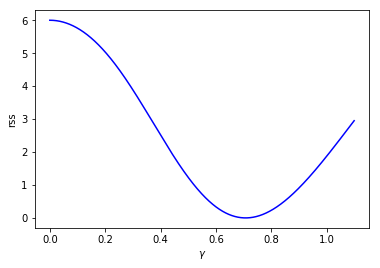

N = 6


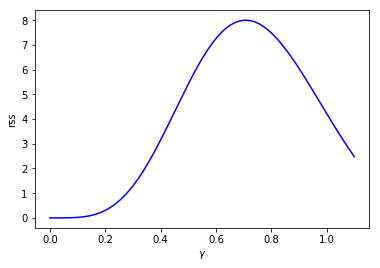

N = 8


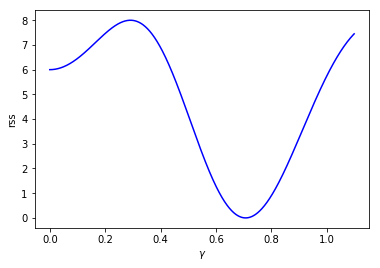

N = 10


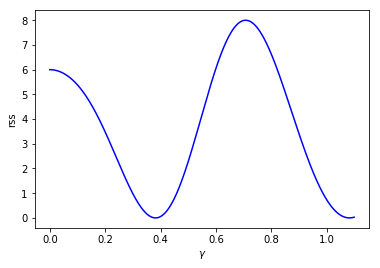

N = 12


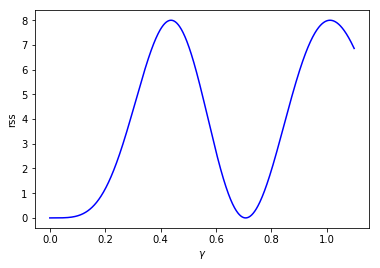

N = 14


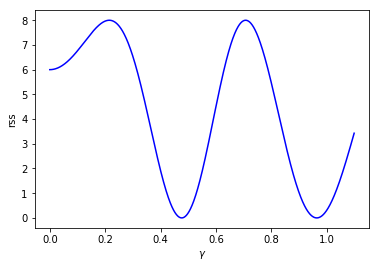

N = 16


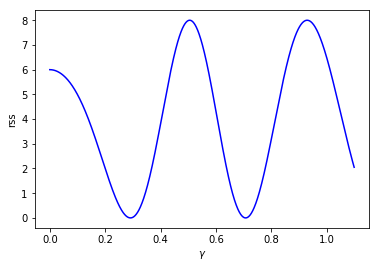

N = 18


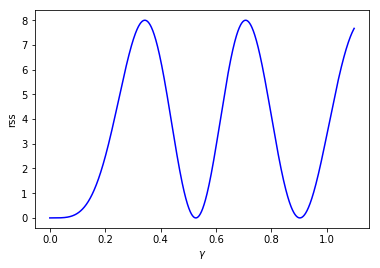

N = 20


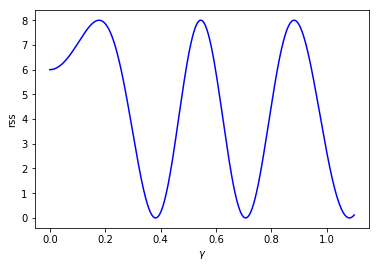

In [55]:
from pylab import *
import math
import numpy as np

# tolerance
epsilon = 0.000001

# range of gamma values to sample
# you can increase this range beyond 1 

delta = 0.001
gamma_range = np.arange(0,1.1,delta)

#estimate gamma value that gives orbit of period n 
def gamma_periodic_numerical(n, phi):
    wedge_angle  = 2*phi
    pp_gamma = []
    min_error = []
    error = np.array([None]*len(gamma_range))
    for i in range(len(gamma_range)):
        gamma =gamma_range[i]
        #print(gamma)
        T_gamma = np.array([[-(1-gamma**2)/(1+gamma**2), -2*gamma/(1+gamma**2),0],
                                    [-2*gamma/(1+gamma**2),(1-gamma**2)/(1+gamma**2),0],
                                   [0,0,-1]])
        theta = -(math.pi-wedge_angle)
        identity = np.array([[1,0,0],
                           [0,1,0],
                           [0,0,1]])
        state = identity
        #run the simulation for this particular gamma
        col_count = 0
        while col_count < n:
            state = new_state(state,theta,gamma)
            theta = -theta;
            col_count += 1   
            
        error[i] =  find_error(state)
        #print(error[i])
    
    
    plt.plot(gamma_range, error, 'b-')
    plt.xlabel('$\gamma$')
    plt.ylabel('rss')
    plt.show()
    
    for i in range(1,len(gamma_range)-1,1):
        #print(error1)
        if error[i-1] > error[i] and error[i+1] > error[i]:
            min_error = np.append(min_error, error[i])
            pp_gamma = np.append(pp_gamma, gamma_range[i])
            
    return [min_error, pp_gamma]
            
# error is the residual sum of squares between the transformation in the nth step and identity matrix    
def rotation(theta):
    return np.array([[1,0,0],
                        [0,cos(theta), -sin(theta)],
                        [0,sin(theta), cos(theta)]])
def reflection(gamma):
    return np.array([[-(1-gamma**2)/(1+gamma**2), -2*gamma/(1+gamma**2),0],
                                    [-2*gamma/(1+gamma**2),(1-gamma**2)/(1+gamma**2),0],
                                   [0,0,-1]])

def new_state(current_state, theta, gamma):
    T_gamma = reflection(gamma)
    R_theta = rotation(theta)
    return np.matmul(np.matmul(R_theta, T_gamma), current_state) 
            
        

def find_error(x):
    error = 0 
    for i in range(3):
        for j in range(3):
            if i == j: 
                error += (x[i][j]-1)**2 
            else:
                error += x[i][j]**2
    return error

# find periodic gammas analytically 
def gamma_periodic_analytical(n):
    per_gamma = []
    z = 1 
    while z-1 < n/4:
        per_gamma = np.append(per_gamma, tan(math.pi/n*z))
        z +=1 
    return per_gamma

# ###########################
# Pick n and the script will list periodic gammas (analytical and numerical) with period up to 2n

import matplotlib.pyplot as plt
import matplotlib.cm as cm
n = 10

for i in range(4,2*n+2,2):
    print('N = ' + str(i))
    temp1 = gamma_periodic_numerical(i,math.pi/6)
    
#    print('pp gamma/s (numerical):' + str(temp1))    
#     temp2 = gamma_periodic_analytical(i)
#     print('pp gamma/s (analytical):' + str(temp2))

In [51]:
# Output for n = 10
# n = 4
# pp gamma/s (numerical):[1.]
# pp gamma/s (analytical):[1.]
# n = 6
# pp gamma/s (numerical):[0.57735]
# pp gamma/s (analytical):[0.57735027]
# n = 8
# pp gamma/s (numerical):[0.41421 1.     ]
# pp gamma/s (analytical):[0.41421356 1.        ]
# n = 10
# pp gamma/s (numerical):[0.32492 0.72654]
# pp gamma/s (analytical):[0.3249197  0.72654253]
# n = 12
# pp gamma/s (numerical):[0.26795 0.57735 1.     ]
# pp gamma/s (analytical):[0.26794919 0.57735027 1.        ]
# n = 14
# pp gamma/s (numerical):[0.22824 0.48157 0.79747]
# pp gamma/s (analytical):[0.22824347 0.48157462 0.79747339]
# n = 16
# pp gamma/s (numerical):[0.19891 0.41421 0.66818 1.     ]
# pp gamma/s (analytical):[0.19891237 0.41421356 0.66817864 1.        ]
# n = 18
# pp gamma/s (numerical):[0.17633 0.36397 0.57735 0.8391 ]
# pp gamma/s (analytical):[0.17632698 0.36397023 0.57735027 0.83909963]
# n = 20
# pp gamma/s (numerical):[0.15838 0.32492 0.50953 0.72654 1.     ]
# pp gamma/s (analytical):[0.15838444 0.3249197  0.50952545 0.72654253 1.        ]    

In [50]:
a = math.pi
print(a)
x = 2/3;
b = 2*math.pi-3;
print(b)

3.14159265359
3.28318530718
